In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
hour_df_mid_usd = pd.read_csv('../cleaned_data/hour_data_mid_usd.csv', index_col='time_utc')
hour_df_mid_usd.index = pd.to_datetime(hour_df_mid_usd.index).tz_localize('UTC').tz_convert('America/New_York').rename('time_est')
hour_df_usd_price = (1/hour_df_mid_usd).fillna(method='ffill')
hour_df_usd_returns = hour_df_usd_price.pct_change()

In [39]:
minute_df_mid_usd = pd.read_csv('../cleaned_data/minute_data_mid_usd.csv', index_col='time_utc')
minute_df_mid_usd.index = pd.to_datetime(minute_df_mid_usd.index).tz_localize('UTC').tz_convert('America/New_York').rename('time_est')
minute_df_usd_price = (1/minute_df_mid_usd).fillna(method='ffill')
minute_df_usd_returns = minute_df_usd_price.pct_change()

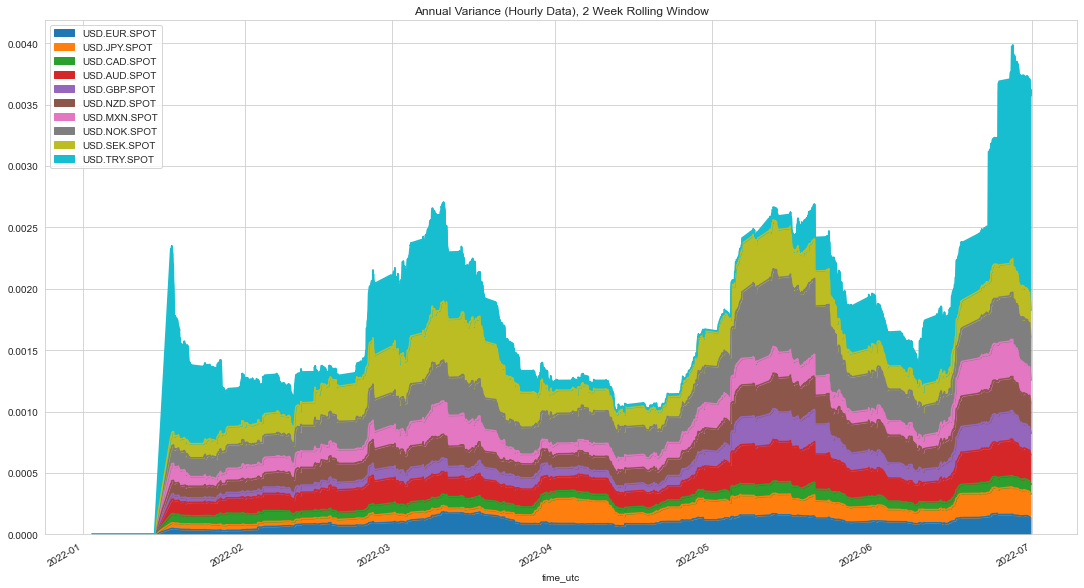

In [27]:
rolling_weekly_var = (hour_df_usd_returns.rolling(10*23).var()*(252*23)**(1/2))
rolling_weekly_var.plot.area(title='Annual Variance (Hourly Data), 2 Week Rolling Window')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

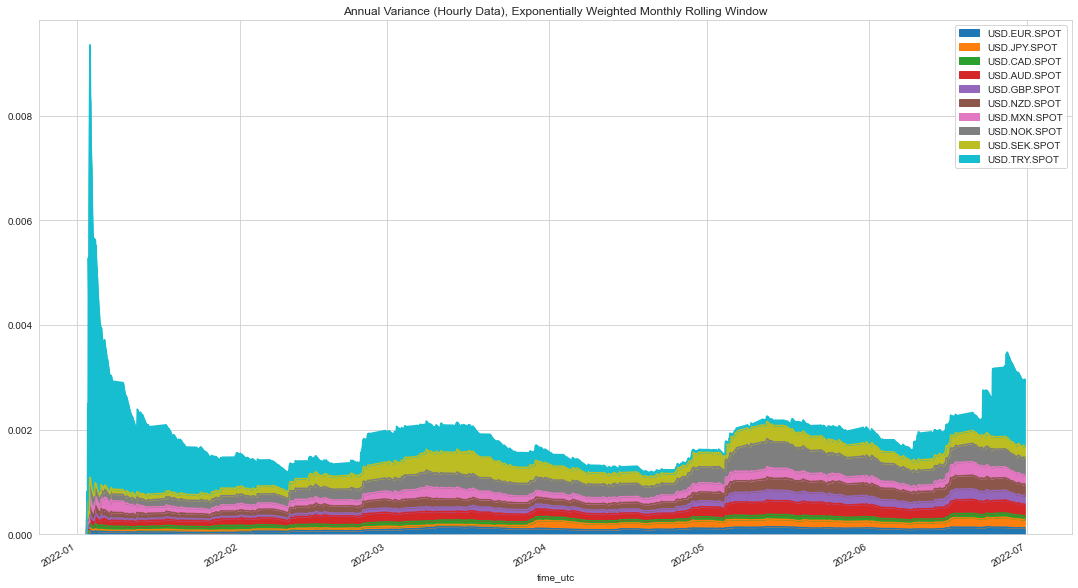

In [31]:
rolling_weekly_var = (hour_df_usd_returns.ewm(span=23*21).var()*(252*23)**(1/2))
rolling_weekly_var.plot.area(title='Annual Variance (Hourly Data), Exponentially Weighted Monthly Rolling Window')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

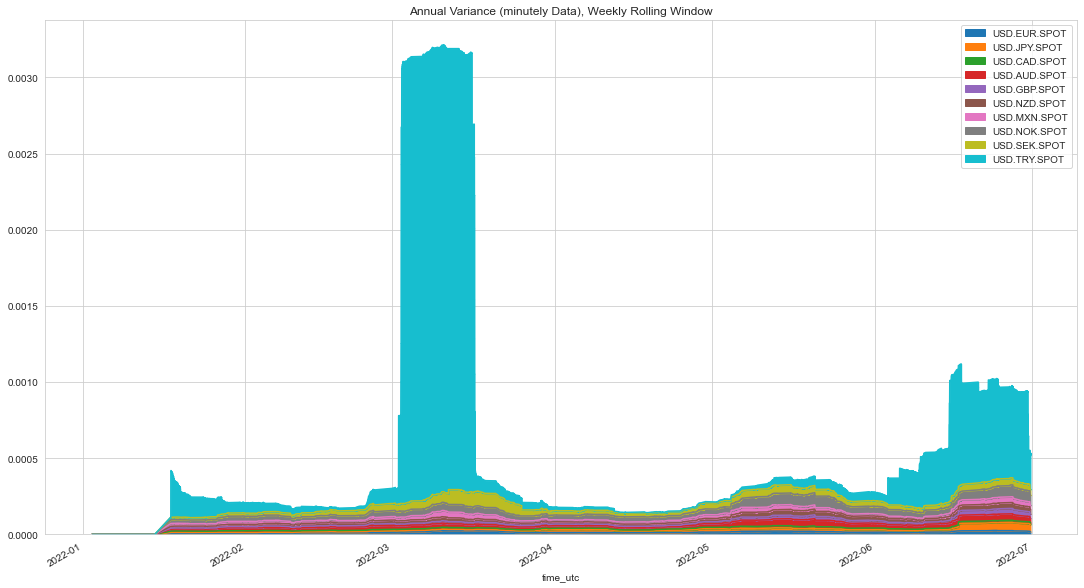

In [34]:
rolling_weekly_var_minute = (minute_df_usd_returns.rolling(10*23*60).var()*(252*23*60)**(1/2))
rolling_weekly_var_minute.plot.area(title='Annual Variance (minutely Data), 2 Week Rolling Window')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

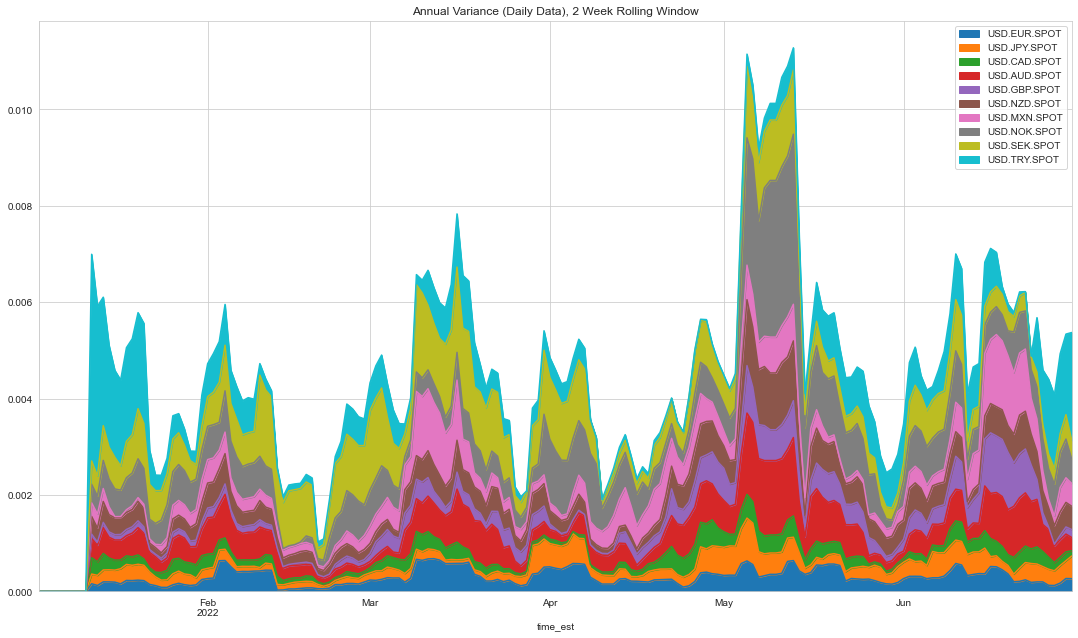

In [42]:
daily_df_usd_price = minute_df_usd_price.resample('1d').last()
daily_df_usd_returns = daily_df_usd_price.pct_change().dropna()
rolling_weekly_var_daily = (daily_df_usd_returns.rolling(10).var()*(252)**(1/2))
rolling_weekly_var_daily.plot.area(title='Annual Variance (Daily Data), 2 Week Rolling Window')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)